# Orbit dynamics + chemical abundances

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import paths
from utils import get_color_list

plt.style.use(paths.styles / 'notebook.mplstyle')

In [2]:
mwm_rgb = pd.read_csv(paths.data / 'MWM' / 'MWM_RGB.csv')
mwm_rgb

/var/folders/_s/lknhlnjn1g1cj388brpgztf80000gn/T/ipykernel_57309/610113364.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mwm_rgb = pd.read_csv(paths.data / 'MWM' / 'MWM_RGB.csv')


,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,c_n,e_c_n,gal_r,gal_phi,gal_z,galpy_r_guide,galpy_z_max,galpy_ecc,galpy_E,galpy_Lz
0,54381291,NaN,421495278551818624,421495278551818624,403218924,16384,tic_v8,25,27021597850714872,4291430952,...,-0.256311,0.024055,12.439019,153.313414,-0.663968,12.222205,0.703732,0.014642,-25272.458243,2564.722834
1,54381397,NaN,421505552113500800,421505552113500800,369831391,16384,tic_v8,25,27021597850723334,4291439436,...,-0.198570,0.024895,10.447799,161.379103,-0.379658,10.506503,0.506564,0.143261,-30486.022363,2245.499245
2,54381405,NaN,421506067509558016,421506067510359808,369831290,16384,tic_v8,25,27021597850724078,4291440182,...,-0.332730,0.018693,10.274266,162.308315,-0.351110,8.760375,0.532926,0.224887,-36536.627138,1911.999891
3,54381758,2M00204981+5625073,421540152367477248,421540152367477248,403307163,16385,gaia_dr3_source,31,63050394783216344,4291448641,...,-0.236124,0.024095,12.096207,154.781406,-0.610219,11.985890,1.989756,0.028805,-25026.240407,2521.123098
4,54381959,2M00224114+5636475,421557607115380608,421557607115380608,403393455,16025,gaia_dr3_source,31,63050394783222145,4291878516,...,-0.371770,0.015182,9.110510,170.227131,-0.163923,8.566006,0.227114,0.170685,-38634.632478,1874.115098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178300,129060878,2M11484212-6220219,5334808943135705600,5334808943135705600,324668848,185355,gaia_dr3_source,31,63050395882762275,5762936654,...,-0.430750,0.023164,7.492782,-141.850596,-0.016213,6.137214,0.027250,0.189417,-53346.952200,1379.630757
178301,129060884,2M09110058-4849577,5326021096449688064,5326021096449688064,364057991,172356,gaia_dr3_source,31,63050395875982757,5802300216,...,-0.322500,0.020773,9.207778,-151.641683,-0.014818,5.354831,0.043301,0.432860,-51779.280078,1208.103473
178302,129060885,2M08333243-3911278,5529360241405866752,5529360241405866752,185021879,160694,gaia_dr3_source,31,63050395950945615,5800869040,...,-0.341250,0.023480,9.899075,-154.976288,0.061825,8.439482,0.310362,0.169676,-39217.032992,1849.352832
178303,129060909,2M13582184-6202236,5866253799616922112,5866253799616922112,325588166,185382,gaia_dr3_source,31,63050396108514375,5632820971,...,-0.577520,0.020591,6.623241,-160.900700,0.007032,7.240775,0.014861,0.100803,-46906.742932,1610.019725


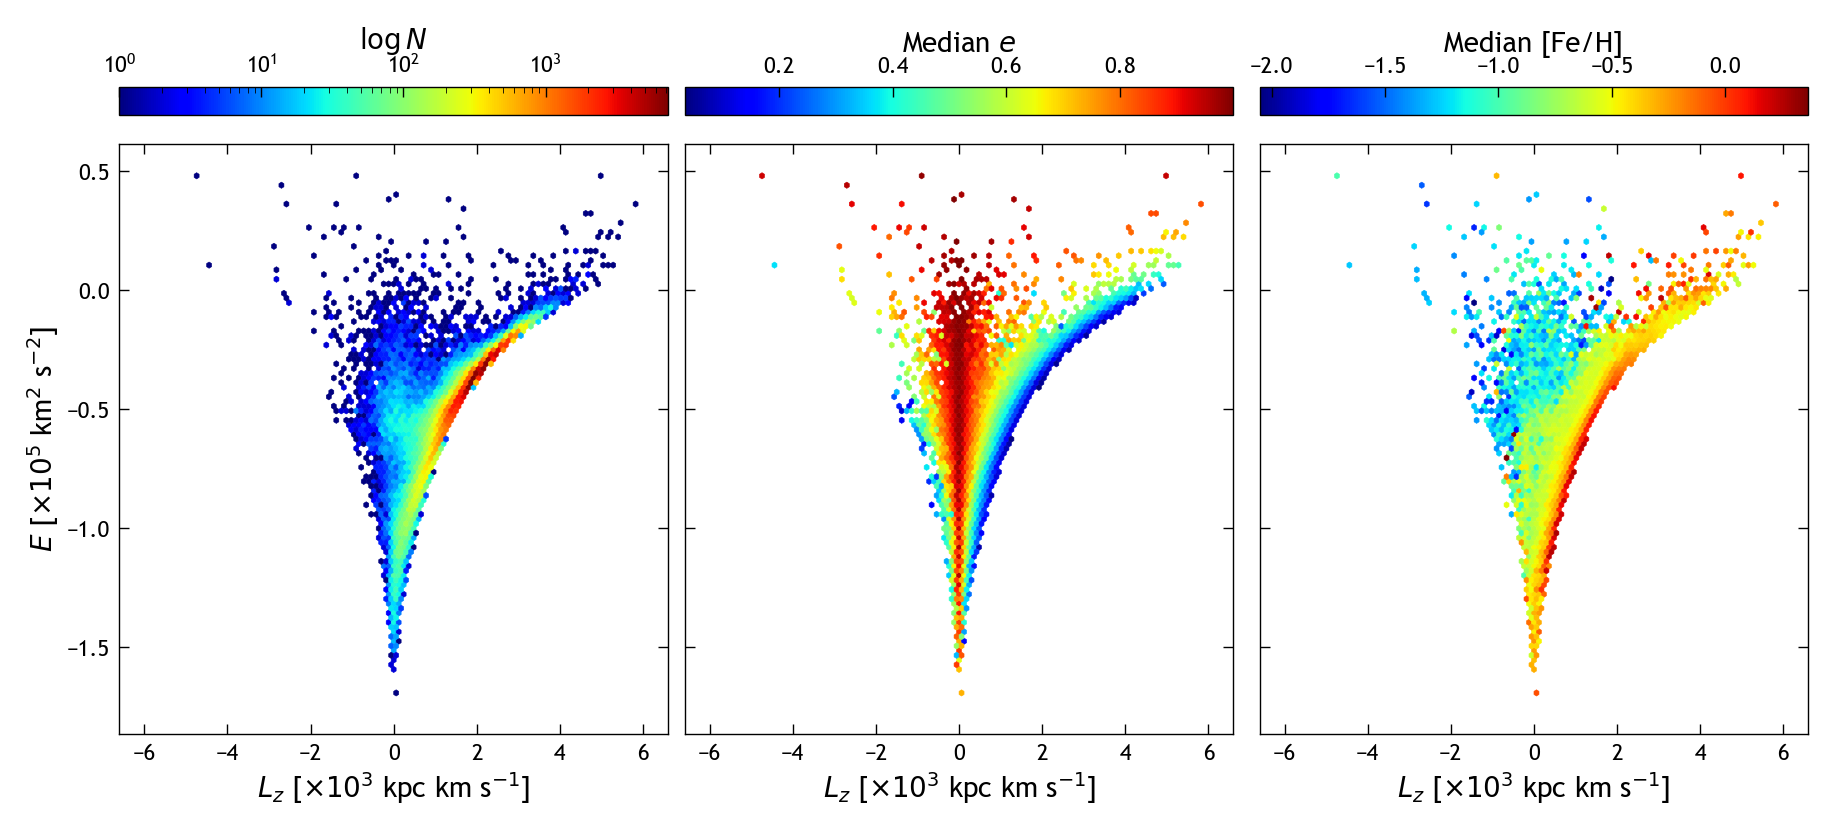

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(9, 4), constrained_layout=True, sharey=True)

kwargs = dict(gridsize=100, cmap='jet', linewidths=0.2, extent=[-6, 6, -1.75, 0.5])
pcm0 = axs[0].hexbin(
    mwm_rgb['galpy_Lz']/1e3, mwm_rgb['galpy_E']/1e5, 
    C=np.ones(mwm_rgb.shape[0]),
    reduce_C_function=np.sum,
    norm=LogNorm(),
    **kwargs
)
fig.colorbar(pcm0, ax=axs[0], orientation='horizontal', location='top', label=r'$\log N$')

pcm1 = axs[1].hexbin(
    mwm_rgb['galpy_Lz']/1e3, mwm_rgb['galpy_E']/1e5, 
    C=mwm_rgb['galpy_ecc'],
    reduce_C_function=np.median,
    **kwargs
)
fig.colorbar(pcm1, ax=axs[1], orientation='horizontal', location='top', label=r'Median $e$')

pcm2 = axs[2].hexbin(
    mwm_rgb['galpy_Lz']/1e3, mwm_rgb['galpy_E']/1e5, 
    C=mwm_rgb['fe_h'],
    reduce_C_function=np.median,
    **kwargs
)
fig.colorbar(pcm2, ax=axs[2], orientation='horizontal', location='top', label=r'Median [Fe/H]')

for ax in axs:
    ax.set_xlabel(r'$L_z$ [$\times10^3$ kpc km s$^{-1}$]')
axs[0].set_ylabel(r'$E$ [$\times 10^5$ km$^2$ s$^{-2}$]')

plt.show()

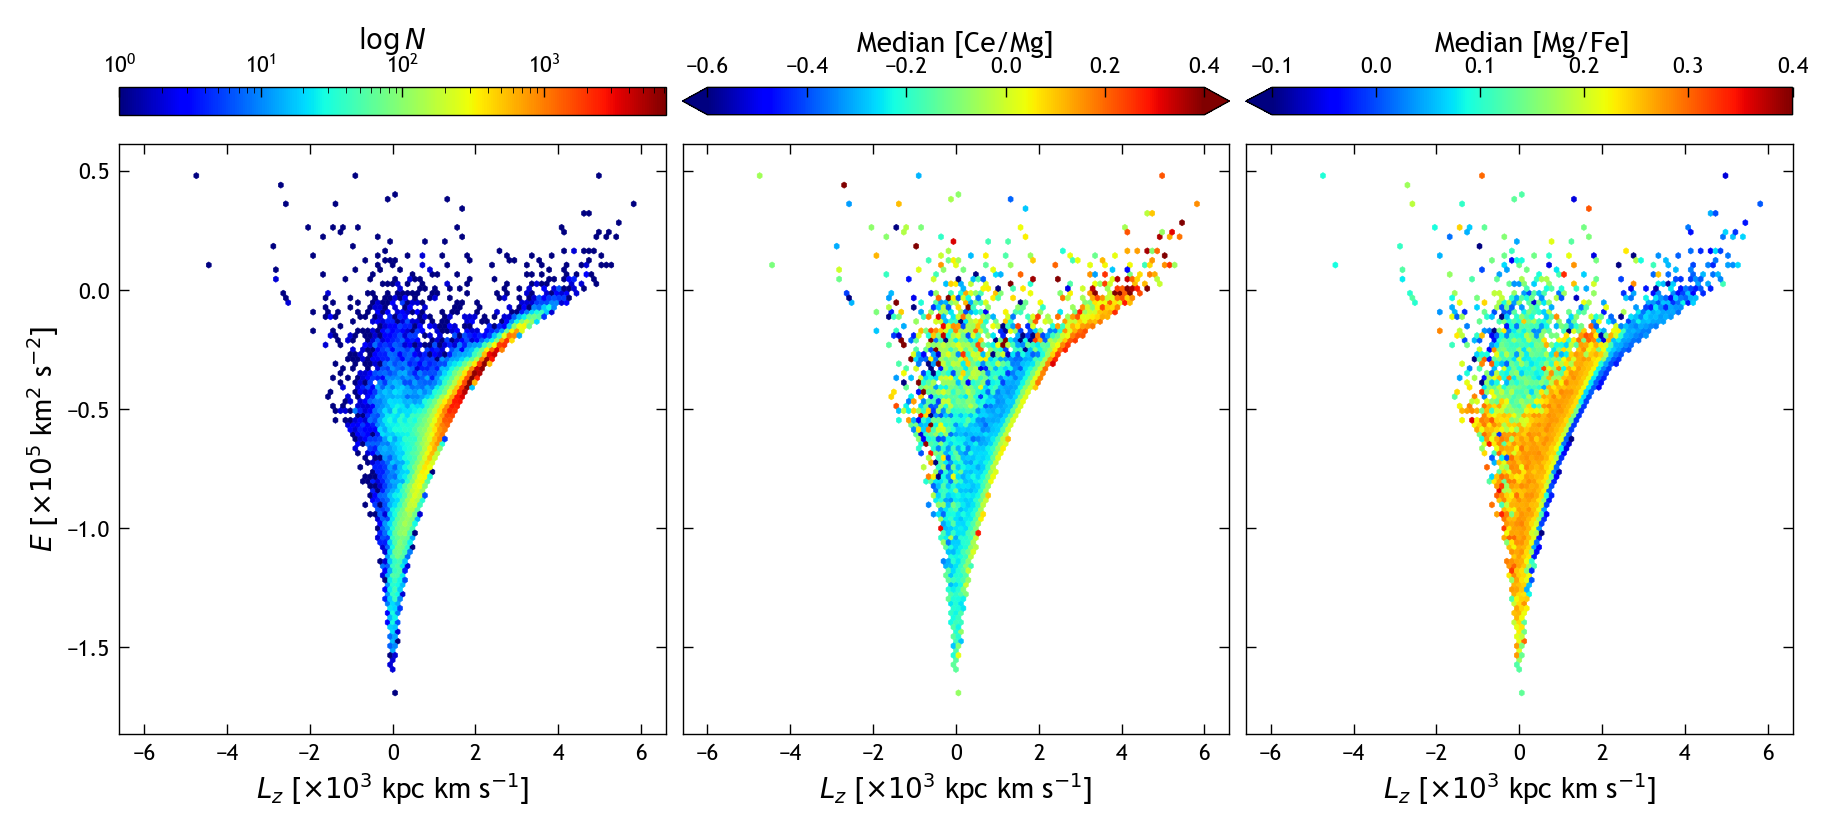

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(9, 4), constrained_layout=True, sharey=True)

kwargs = dict(gridsize=100, cmap='jet', linewidths=0.2, extent=[-6, 6, -1.75, 0.5])
pcm0 = axs[0].hexbin(
    mwm_rgb['galpy_Lz']/1e3, mwm_rgb['galpy_E']/1e5, 
    C=np.ones(mwm_rgb.shape[0]),
    reduce_C_function=np.sum,
    norm=LogNorm(),
    **kwargs
)
fig.colorbar(pcm0, ax=axs[0], orientation='horizontal', location='top', label=r'$\log N$')

pcm1 = axs[1].hexbin(
    mwm_rgb['galpy_Lz']/1e3, mwm_rgb['galpy_E']/1e5, 
    C=mwm_rgb['ce_mg'],
    reduce_C_function=np.median,
    vmin=-0.6, vmax=0.4,
    **kwargs
)
fig.colorbar(pcm1, ax=axs[1], orientation='horizontal', location='top', extend='both', label=r'Median [Ce/Mg]')

pcm2 = axs[2].hexbin(
    mwm_rgb['galpy_Lz']/1e3, mwm_rgb['galpy_E']/1e5, 
    C=mwm_rgb['mg_fe'],
    reduce_C_function=np.median,
    vmin=-0.1, vmax=0.4,
    **kwargs
)
fig.colorbar(pcm2, ax=axs[2], orientation='horizontal', location='top', extend='min', label=r'Median [Mg/Fe]')

for ax in axs:
    ax.set_xlabel(r'$L_z$ [$\times10^3$ kpc km s$^{-1}$]')
axs[0].set_ylabel(r'$E$ [$\times 10^5$ km$^2$ s$^{-2}$]')

plt.show()

In [46]:
mwm_rgb_local = mwm_rgb[
    (mwm_rgb['gal_r'] >= 7) & 
    (mwm_rgb['gal_r'] < 9) & 
    (mwm_rgb['gal_z'].abs() < 2)
].copy()
mwm_rgb_local.shape

(62793, 409)

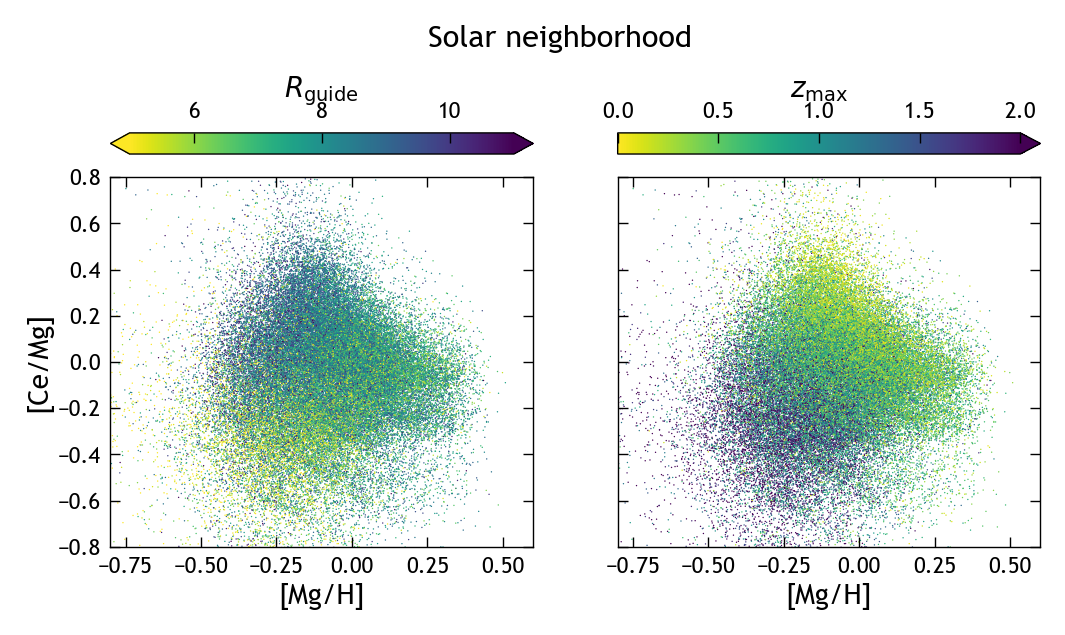

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
kwargs = dict(s=1, marker='.', rasterized=True, edgecolor='none')

pc0 = axs[0].scatter(
    mwm_rgb_local['mg_h'], 
    mwm_rgb_local['ce_mg'], 
    c=mwm_rgb_local['galpy_r_guide'], 
    vmin=5, vmax=11, 
    cmap='viridis_r',
    **kwargs
)
fig.colorbar(
    pc0, 
    ax=axs[0], 
    orientation='horizontal', 
    location='top', 
    extend='both', 
    label=r'$R_{\rm guide}$'
)
pc1 = axs[1].scatter(
    mwm_rgb_local['mg_h'], 
    mwm_rgb_local['ce_mg'], 
    c=mwm_rgb_local['galpy_z_max'], 
    vmin=0, vmax=2,
    cmap='viridis_r',
    **kwargs
)
fig.colorbar(
    pc1, 
    ax=axs[1], 
    orientation='horizontal', 
    location='top', 
    extend='max', 
    label=r'$z_{\rm max}$'
)

axs[0].set_xlim((-0.8, 0.6))
axs[0].set_ylim((-0.8, 0.8))

for ax in axs:
    ax.set_xlabel('[Mg/H]')
axs[0].set_ylabel('[Ce/Mg]')

fig.suptitle('Solar neighborhood')
plt.show()

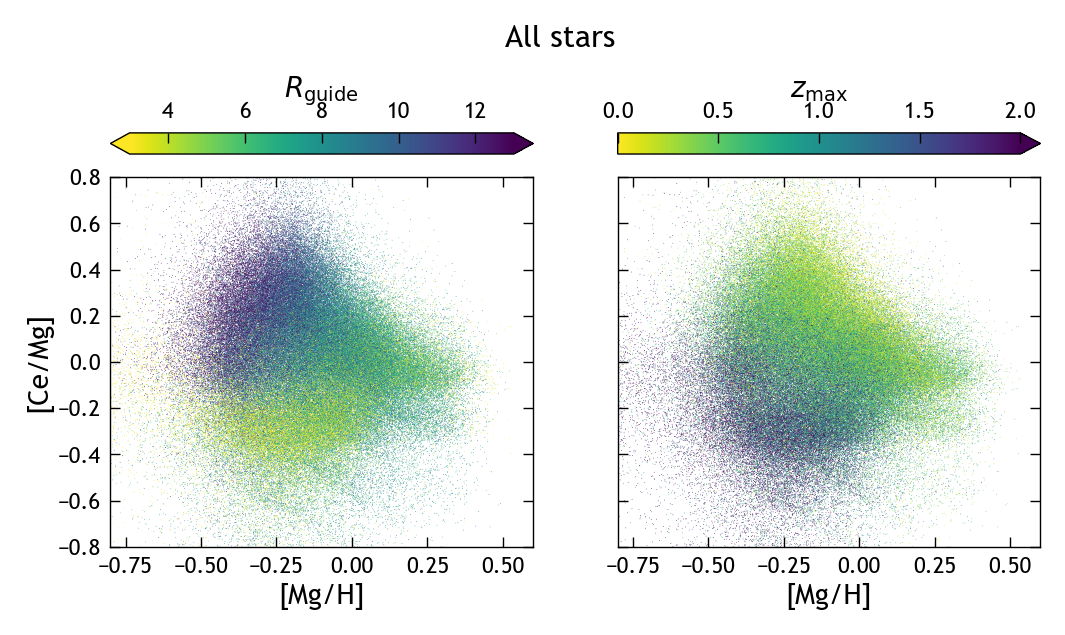

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
kwargs = dict(s=0.3, marker='.', rasterized=True, edgecolor='none')

pc0 = axs[0].scatter(
    mwm_rgb['mg_h'], 
    mwm_rgb['ce_mg'], 
    c=mwm_rgb['galpy_r_guide'], 
    vmin=3, vmax=13, 
    cmap='viridis_r',
    **kwargs
)
fig.colorbar(
    pc0, 
    ax=axs[0], 
    orientation='horizontal', 
    location='top', 
    extend='both', 
    label=r'$R_{\rm guide}$'
)
pc1 = axs[1].scatter(
    mwm_rgb['mg_h'], 
    mwm_rgb['ce_mg'], 
    c=mwm_rgb['galpy_z_max'], 
    vmin=0, vmax=2,
    cmap='viridis_r',
    **kwargs
)
fig.colorbar(
    pc1, 
    ax=axs[1], 
    orientation='horizontal', 
    location='top', 
    extend='max', 
    label=r'$z_{\rm max}$'
)

axs[0].set_xlim((-0.8, 0.6))
axs[0].set_ylim((-0.8, 0.8))

for ax in axs:
    ax.set_xlabel('[Mg/H]')
axs[0].set_ylabel('[Ce/Mg]')

fig.suptitle('All stars')
plt.show()

In [24]:
def alpha_cut(feh):
    """Returns [Mg/Fe] cut as function of [Fe/H]."""
    return np.where(
        feh >= 0.0,
        0.1,
        0.1 - 0.13*feh
    )

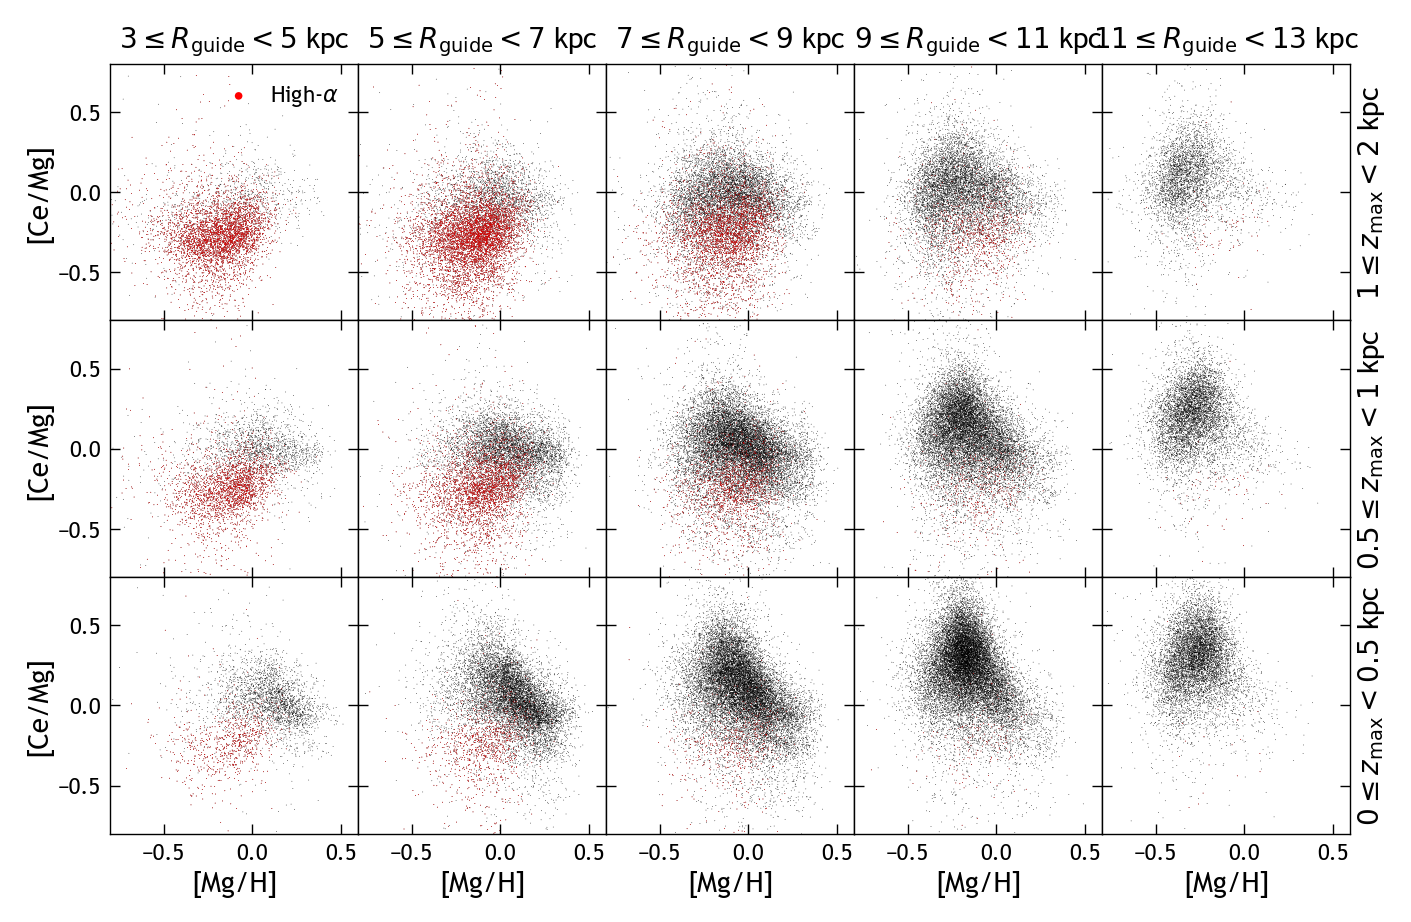

In [25]:
rbins = np.arange(3, 15, 2)
zbins = [0, 0.5, 1, 2]
alpha_buffer = 0.02

kwargs = dict(s=0.3, marker='.', rasterized=True, edgecolor='none')

fig, axs = plt.subplots(
    len(zbins)-1, len(rbins)-1,
    figsize=(8, 5), sharex=True, sharey=True,
    gridspec_kw={'hspace': 0, 'wspace': 0},
    dpi=200
)

for i, row in enumerate(axs):
    absz_lim = (zbins[-(i+2)], zbins[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (rbins[j], rbins[j+1])
        subset = mwm_rgb[
            (mwm_rgb['galpy_r_guide'] >= galr_lim[0]) &
            (mwm_rgb['galpy_r_guide'] < galr_lim[1]) &
            (mwm_rgb['galpy_z_max'].abs() >= absz_lim[0]) &
            (mwm_rgb['galpy_z_max'].abs() < absz_lim[1])
        ]
        ax.scatter(subset['mg_h'], subset['ce_mg'], c='k', **kwargs)
        high_alpha = subset[
            subset['mg_fe'] > alpha_cut(subset['fe_h']) + alpha_buffer
        ]
        ax.scatter(high_alpha['mg_h'], high_alpha['ce_mg'], c='r', 
                   label=r'High-$\alpha$', **kwargs)

# Format axes
axs[0,0].set_xlim((-0.8, 0.6))
axs[0,0].set_ylim((-0.8, 0.8))
for ax in axs[-1,:]:
    ax.set_xlabel('[Mg/H]')
for i, ax in enumerate(axs[0,:]):
    ax.set_title(r'$%s\leq R_{\rm guide}<%s$ kpc' % (rbins[i], rbins[i+1]), fontsize=10)
for ax in axs[:,0]:
    ax.set_ylabel('[Ce/Mg]')
for i, ax in enumerate(axs[:,-1]):
    ax.yaxis.set_label_position('right')
    ax.set_ylabel(r'$%s\leq z_{\rm max}<%s$ kpc' % (zbins[-(i+2)], zbins[-(i+1)]))
axs[0,0].legend(markerscale=10)

plt.show()